## Team 23: Goosebumps

### Team Members: 
- Anjum Anis Khandeshi 
- Devansh Khunteta
- Oscar Laird 
- Shyam Balasubramania Pillai

<span style="color:blue; font-size:2em;"> **SETUP** </span>

[You can remove this text from the final report. This is just to help you set up correctly.] 

Some tips for using jupyter notebook:
1. Check whether you are in code or markdown mode in each cell of the report. You can switch between them by clicking on the dropdown.
2. To plot figures, use plot_data() defined below. If you need to insert an image using markdown, you can use this code: `![title](image_folder/image_name.png)`
3. You should not have to edit the python files in the github repository for any of the tasks below. We have shared them just in case though.

In [2]:
# this function creates all in-line plots. DO NOT DELETE.
import matplotlib
matplotlib.use('TkAgg')
%matplotlib inline
import matplotlib.pyplot as plt


def plot_data(data):
    # adjust rcParams as needed to make your graph readable
    plt.rcParams['figure.figsize'] = [10, 5]
    plt.title('X,Y,Z Plot')
    plt.plot([row[0] for row in data],[row[1] for row in data], label="x")
    plt.plot([row[0] for row in data],[row[2] for row in data], label="y")
    plt.plot([row[0] for row in data],[row[3] for row in data], label="z")
    plt.legend(loc='upper right')
    plt.show()

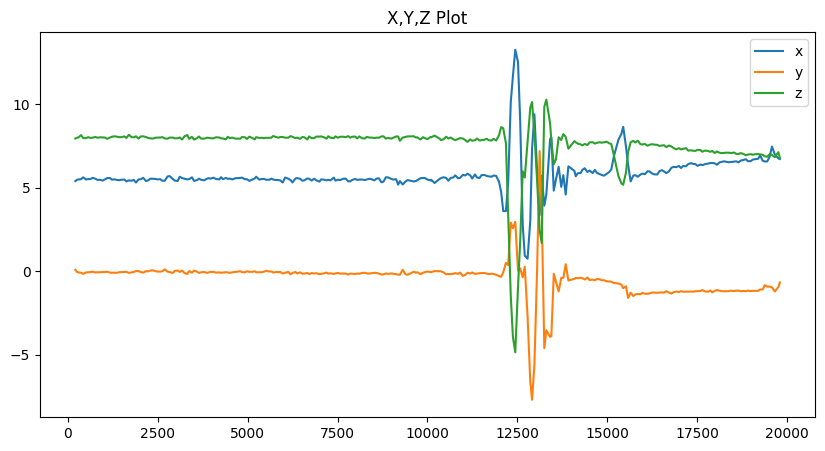

In [3]:
# this file is test.py
import parser_data
# numpy imported to check if the student has numpy
import numpy


data = parser_data.get_data("test.csv")
plot_data(data)

<span style="color:blue; font-size:2em;"> **TASK 1** </span>

### INSTRUCTIONS

**In your report** <br>

Calculate: <br> 
**a. [3 points]** Open walking_steps.csv collected and check relative_time column. What is the sampling rate for the accelerometer data?

Reflect: <br>
**b. [3 points]** Is the sampling rate stable for the file walking_steps.csv? What is the variation? If it is not stable, explain what could be affecting the stability of the rate? (Hint: https://pure.au.dk/ws/files/93103132/sen099_stisenAT3.pdf, no need to thoroughly read the whole paper, this is just to lead you to think in the right direction. Looking at the first two pages should be sufficient) <br> 
**c. [3 points]** How does your understanding from part (a) affect your data processing pipeline? <br>
**d. [3 points]** How can we make the data easier to work with (hint: [re-sampling the data](https://docs.scipy.org/doc/scipy-0.16.0/reference/generated/scipy.signal.resample.html) )? Choose one method of your choice and briefly explain how the math works. <br> 
**e. [3 points]** Do you think the current  sampling rate is a good basis for capturing human movements like walking?  Explain your reasons for or against your case.  <br> 

# a

34950 samples / 69.67s = 501.7 Hz

In [4]:
# §1.b

data = parser_data.get_data("walking_steps_1.csv")
import numpy as np
timestamps = np.array([row[0] for row in data])
deltas = np.diff(timestamps)
print(f"""Time Deltas
Mean: {np.mean(deltas)}
Std: {np.std(deltas)}
Std/Mean: {np.std(deltas)/np.mean(deltas)}
""")

Time Deltas
Mean: 0.0019931509935042636
Std: 6.988822408076645e-07
Std/Mean: 0.0003506418947111091



# b

The sampling rate is not perfectly stable. It averages 500Hz but timestep length varies on the order of 0.03%.
The paper suggests a few causes of sampling rate instability including "delays in OS level timestamp attachment to sensor measurements."

# c / d

We desire a time series of equal timesteps for processing. We made need to do some preprocessing to resample at a consistent rate.

# e

I expect that the current sampling rate is excessive. The current rate is 500Hz.

From class we have the heuristic that human motions are typically below 10Hz.

Or consider another perspective: in the binary classification (walking/climbing) task we are trying to extract about 1 bit of information per second.
At present we are collecting 500x3 = 1500 data points per second. This is excessive.

<span style="color:blue; font-size:2em;"> **TASK 2** </span>

### INSTRUCTIONS

**In your report** <br>
**a. [5 points]** Plot X, Y, Z  for walking_steps.csv and walking_steps_clean.csv <br>
**b. [5 points]** Plot X, Y, Z  for walking_steps2.csv and walking_steps_clean2.csv <br>
**c. [5 points]** Reflect on the movements in each axis, X, Y, Z of walking_steps_clean.csv. Give details as to how you collected the data and it resulted in movement in each axis.  <br>

**Code and Data files** <br>
In folder /data - Add walking_steps_clean.csv<br>
task2.py - Modify code clean_data below

**Note : Make sure you add/modify code below or your task 2 will not be graded.**  

Plotting walking_steps_1.csv


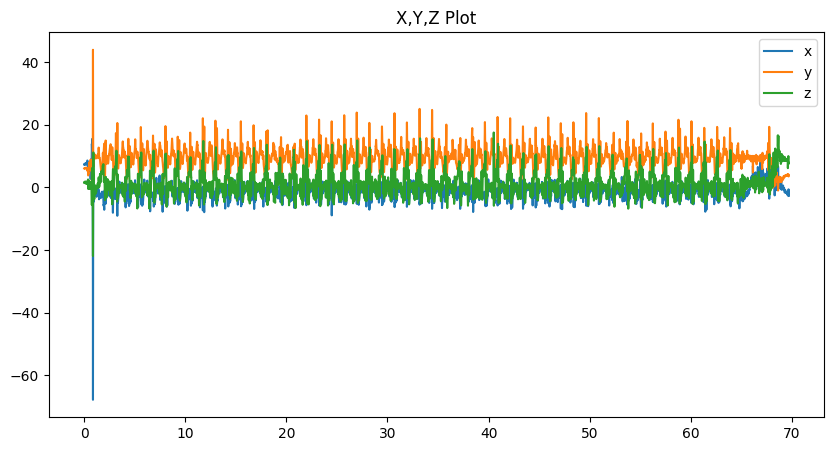

Plotting cleaned walking_steps_1.csv


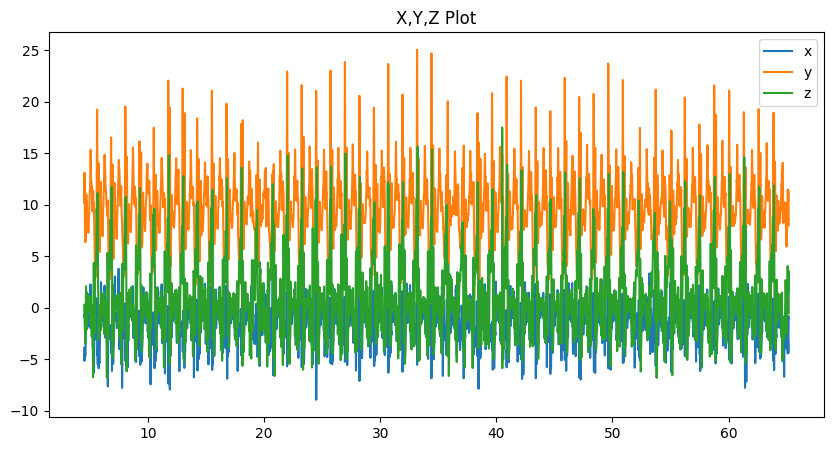

Plotting walking_steps_2.csv


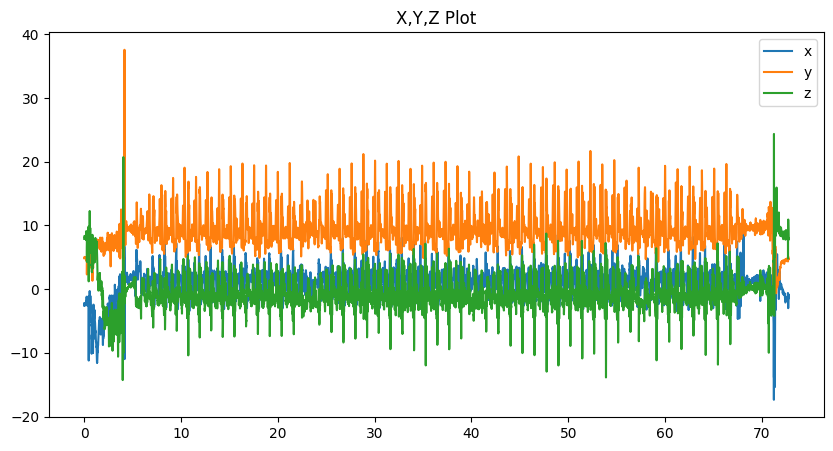

Plotting cleaned walking_steps_2.csv


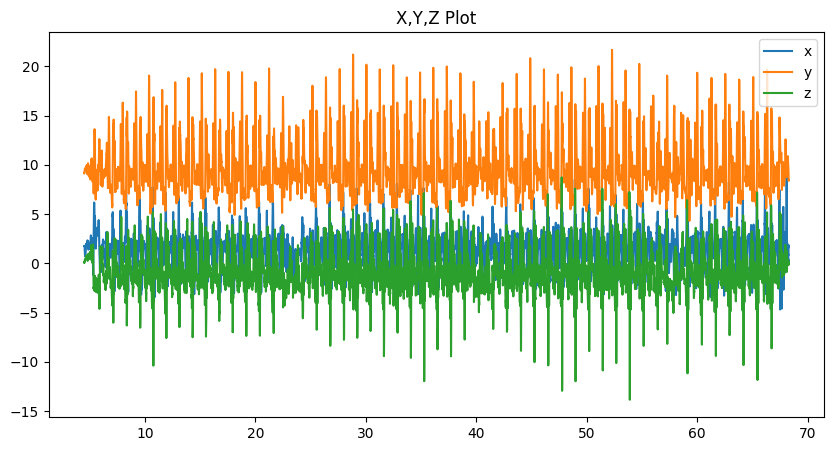

In [5]:
# this is task2.py
import parser_data

def clean_data(data, num=None, start_time=4.5, stop_time=4.5, freq=500):
    # print ("Write code to remove garbage data")
    data = data[int(start_time*freq):int(-stop_time*freq)]


    # print ("Create new file without garbage data and save it in data folder")
    file_name_clean = "walking_steps_clean.csv"
    if num is not None:
        file_name_clean = f"data/walking_steps_{num}_clean.csv" 
        with open(file_name_clean, "w") as f:
            f.write("time,X,Y,Z\n")
            # write your cleaned data to the file
            for row in data:
                f.write("{},{},{},{}\n".format(row[0], row[1], row[2], row[3]))

def main():
    # Get data
    for i in [1,2]:
        file_name = f"walking_steps_{i}.csv" # Change to your file name 
        data = parser_data.get_data(file_name) #data -- time,X,Y,Z 
        clean_data(data, i)
        newdata = parser_data.get_data(f"walking_steps_{i}_clean.csv")
        
        # Plot original and clean data
        print(f"Plotting {file_name}")
        plot_data(data)
        print(f"Plotting cleaned {file_name}")
        plot_data(newdata)


if __name__== "__main__":
    main()



# c

We collected this data with the phone oriented vertically in the walker's pocket.
If the accelerometer data has been oriented to the phone's axes, then that explains why most of the acceleration is in the y-axis (vertical motion up and down).

<span style="color:blue; font-size:2em;"> **TASK 3** </span>

In [6]:
# this is util.py
from scipy.signal import butter, lfilter
import numpy


def vector_magnitude(data):
    """ function to calculate the magnitude of a vector

    Calculate the magnitude of the vector superposition of data (for
    example, acceleration) on x, y, and z axis

    Arguments:
        data: array of (x, y, z) tuples for a vector

    Returns:
        array of the magnitude of a vector

    """
    np = numpy
    np_data = np.array(data)
    np_data = np_data[:,-3:]  # remove time column if it exists
    return np.sqrt(np.sum(np_data**2, axis=1))


def moving_average(data, window_size):
    """ moving average filter

    Implement a simple moving average filter to use as a low pass
    filter

    Arguments:
        data: data be filtered
        window_size: window_size chosen for the data

    Returns:
        The filtered data.

    TODO:
        Finish this function. Think about how you want to handle
        the size difference between your input array and output array.
        You can write it yourself or consider using numpy.convole for
        it:
        https://docs.scipy.org/doc/numpy/reference/generated/numpy.convolve.html

    """
    # assume data is a 1D array of magnitude values
    np = numpy
    data = np.array(data)
    window = np.ones(window_size)/window_size
    return np.convolve(data, window, mode='valid')  # requires complete overlap of arrays

# a

1. below

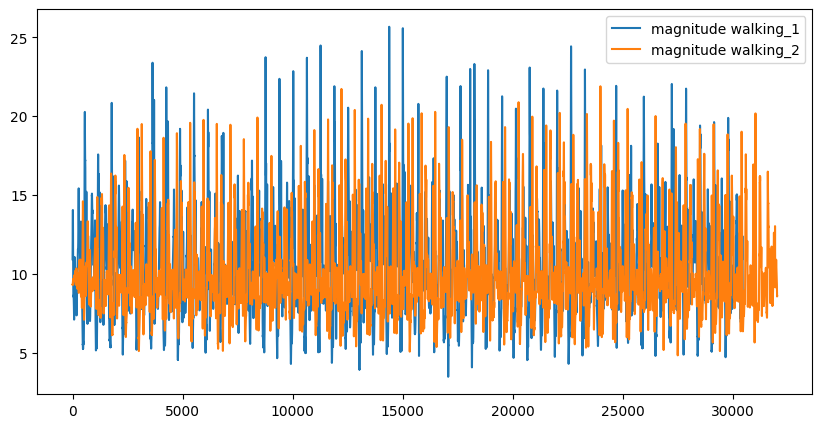

In [7]:
# plot the magnitudes for walking_steps_1_clean.csv and walking_steps_2_clean.csv
data1 = parser_data.get_data("walking_steps_1_clean.csv")
mag1 = vector_magnitude(data1)
data2 = parser_data.get_data("walking_steps_2_clean.csv")
mag2 = vector_magnitude(data2)
plt.plot(mag1, label="magnitude walking_1")
plt.plot(mag2, label="magnitude walking_2")
plt.legend(loc='upper right')

# b

1. The moving average plot is smoother than that of the magnitude.
2. It requires choosing a window size. Here I have chosen 157 samples for reasons discussed in part (d)

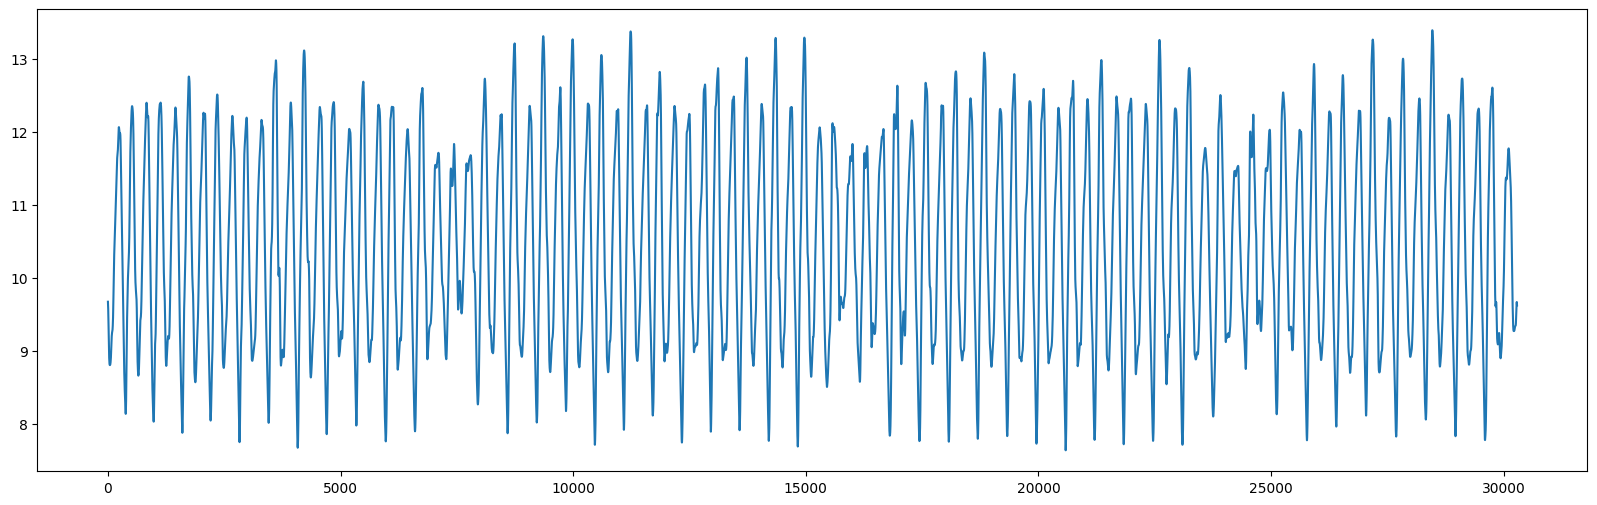

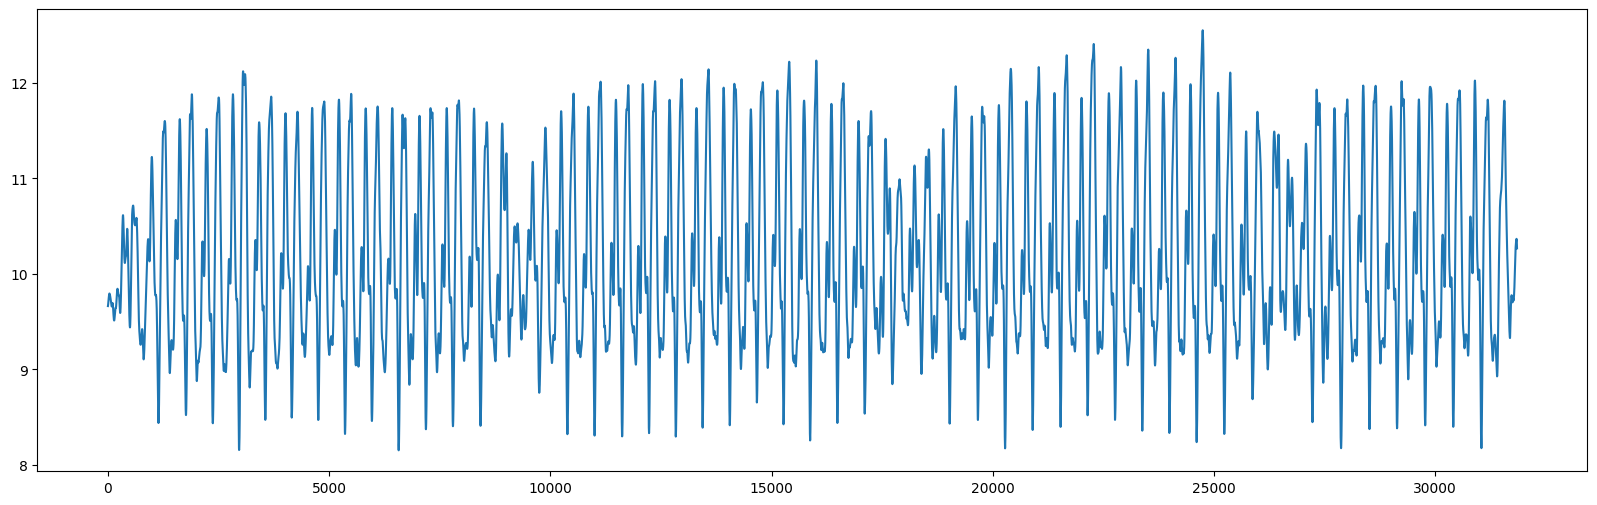

In [188]:
# b

ma1 = moving_average(mag1, 157)
plt.plot(ma1, label="moving average walking_1")
plt.show()
ma2 = moving_average(mag2, 157)
plt.plot(ma2, label="moving average walking_2")

# c
Our method consists of three steps:
- identify the approximate period by taking the first max of the acf function
- take a triangular moving average with a width of half this period
- count crossings of the mean

Result: 95 steps

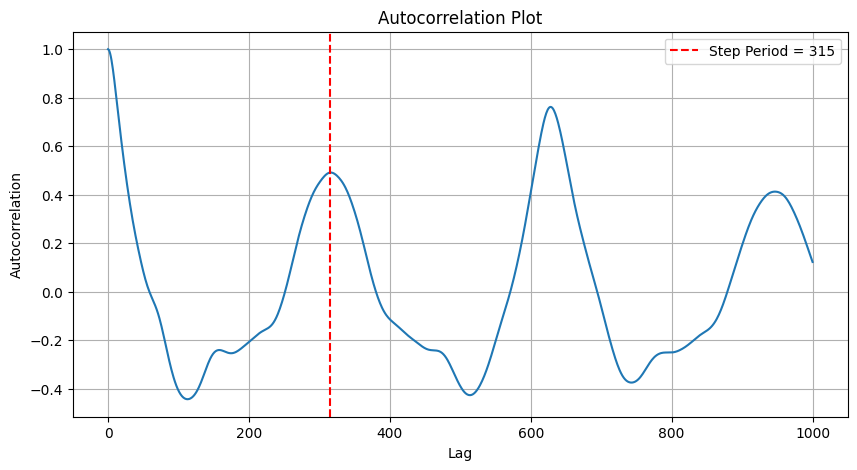

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import acf

# Assuming your time series is stored in `time_series`
autocorr = acf(mag1, nlags=1000)  # Set nlags to a value slightly higher than your expected periodicity
plt.figure()
plt.plot(autocorr)
plt.title("Autocorrelation Plot")
plt.xlabel("Lag")
plt.ylabel("Autocorrelation")
plt.grid(True)
plt.axvline(x=315, color='r', linestyle='--', label="Step Period = 315")
plt.legend(loc='upper right')
plt.show()

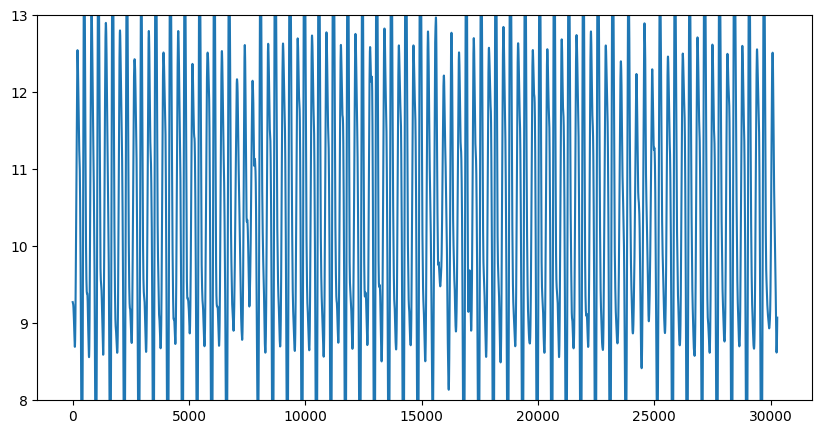

In [10]:
def make_triangular_window(window_size):
    np = numpy
    mid_idx = window_size//2
    window = mid_idx - np.abs(np.arange(-mid_idx, -mid_idx + window_size))
    window = window.astype(float) / np.sum(window)
    return window

def triangular_ma(data, window_size):
    np = numpy
    data = np.array(data)
    window = make_triangular_window(window_size)
    return np.convolve(data, window, mode='valid')

# tma1 = make_triangular_window(7)
tma1 = triangular_ma(mag1, 157)
plt.ylim(8.0, 13.0)
plt.plot(tma1, label="triangular moving average walking_1")

In [11]:
# very simple step-counter:
#  count how many times the tma1 crosses 10.5
step_count = 0
for i in range(1, len(tma1)):
    if tma1[i-1] < 10.5 and tma1[i] >= 10.5:
        step_count += 1
print(f"Step count walking_1: {step_count}")

Step count walking_1: 95


# d
walking_1: 95 steps
walking_2: 103 steps

We also plot our identified steps for each series

Accelerometer data graph


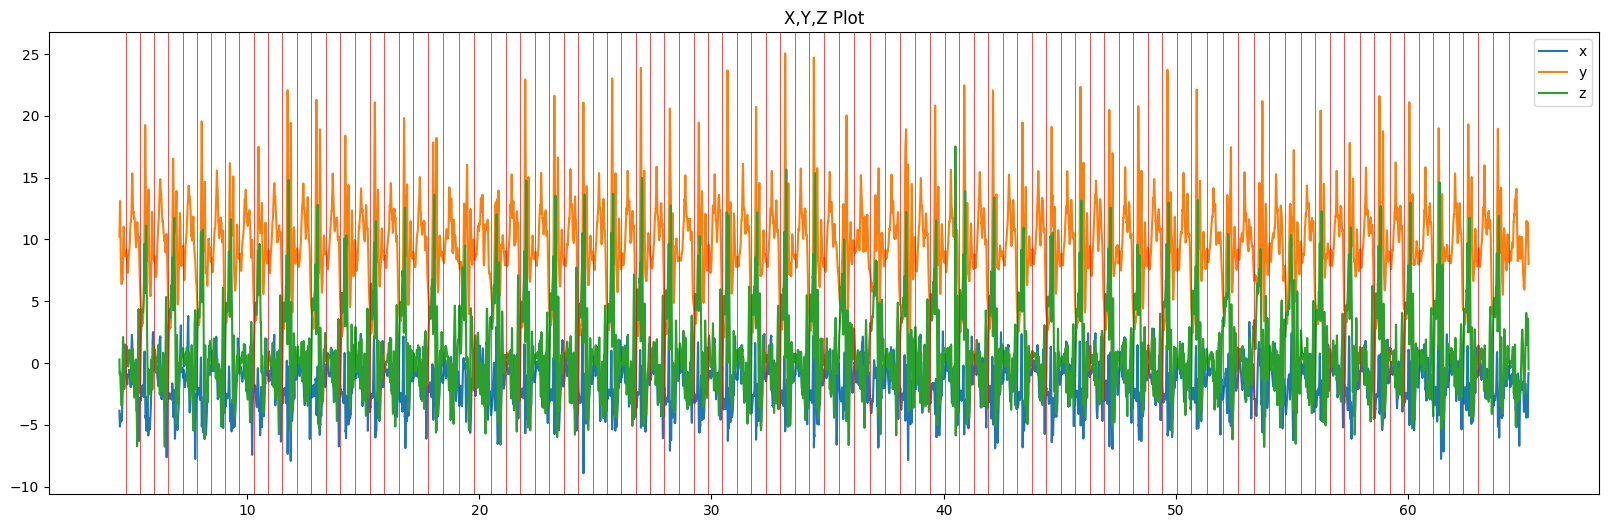

Number of steps counted are : 95
Accelerometer data graph


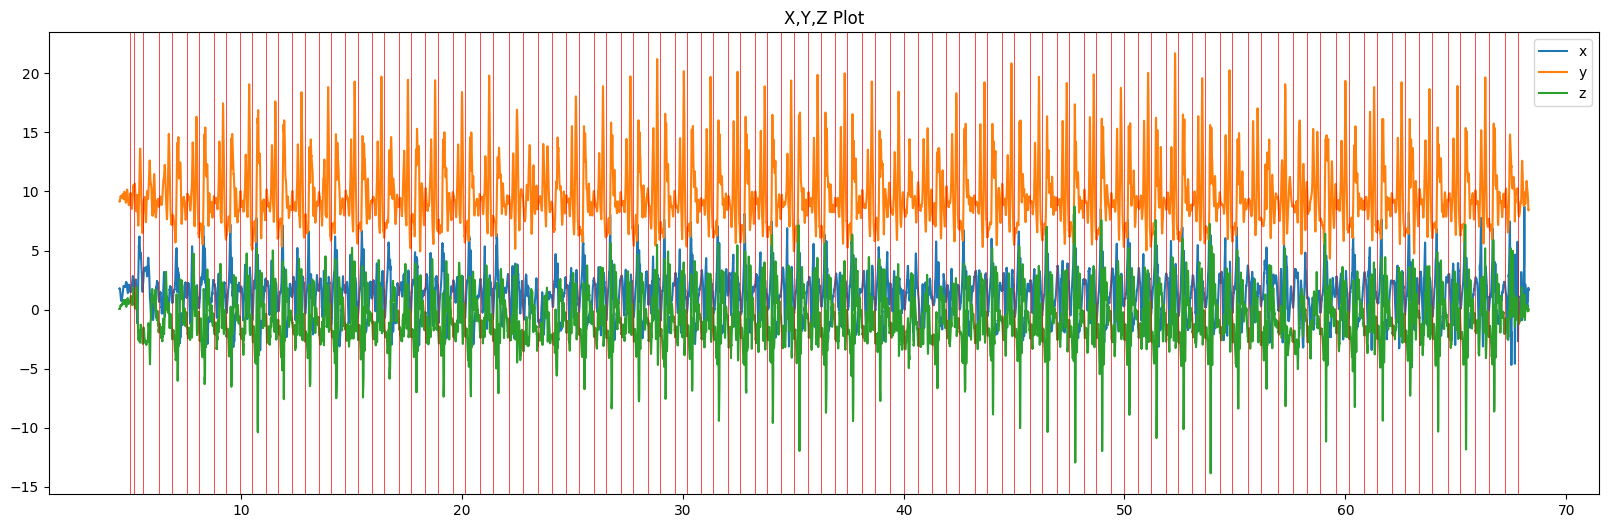

Number of steps counted are : 103


In [189]:
# this is task3.py
import parser_data

def plot_data_w_steps_labelled(data, step_idxs):
    # adjust rcParams as needed to make your graph readable
    plt.rcParams['figure.figsize'] = [20, 6]
    plt.title('X,Y,Z Plot')
    plt.plot([row[0] for row in data],[row[1] for row in data], label="x")
    plt.plot([row[0] for row in data],[row[2] for row in data], label="y")
    plt.plot([row[0] for row in data],[row[3] for row in data], label="z")
    # plot a vertical line at each step
    for idx in step_idxs:
        plt.axvline(x=data[idx][0], color='r', linestyle='-', linewidth=0.5)
    plt.legend(loc='upper right')
    plt.show()


def count_steps(data, i):
    print("Accelerometer data graph")
    # plot_data(data)
    mag = vector_magnitude(data)
    tma = triangular_ma(mag, 157)
    num_steps = 0
    median_tma = numpy.median(tma)
    step_idxs = []
    for i in range(1, len(tma)):
        if tma[i-1] < median_tma and tma[i] >= median_tma:
            step_idxs.append(i)
            num_steps += 1
    max_ampl_idxs = []
    for i in range(1, len(step_idxs)):
        max_ampl_idxs.append(numpy.argmax(mag[step_idxs[i-1]:step_idxs[i]]) + step_idxs[i-1])
    plot_data_w_steps_labelled(data, step_idxs)
    return num_steps


def main():
    # Get data
    for i in [1,2]:
        file_name = f"walking_steps_{i}_clean.csv" 
        data = parser_data.get_data(file_name)
        number_of_steps = count_steps(data, i)
        print("Number of steps counted are : {0:d}".format(number_of_steps))

if __name__== "__main__":
    main()



<span style="color:blue; font-size:2em;"> **TASK 4** </span>

### INSTRUCTIONS
**In your report** <br>
a. **[10 points]** Explain your algorithm for segmentation, with rationale.  <br>
b. **[5 points]** Plot of pre-segmented data.  Plot segmented data for climbing and walking. Make sure the way you plot (colors/ boxes/lines) easily differentiates the two. <br>
c. **[5 points]** What was the difference in the step counting method from task 3? <br>
d. **[5 points]** How many steps of stairs did you count? Plot labeled data for climbed steps. <br>
e. **[5 points]** Reflect on this exercise and compare it with what you learned in class. (hint: bulling’s activity recognition chain) <br>


**Code and Data files** <br>
In folder /data - Add climbing_steps.csv <br>
Task4.py - modify segment_climbing_walking, count_steps below <br>

**Note: Make sure you add/modify code below or your task 4 will not be graded.**

# a

We use a simple thresholding algorithm to segment activities. We only analyze the Y component of the data from the gyroscope. We do not use acceleration data (for segmentation). The Y component of the gyroscope is the most informative. We believe this is because on each landing the experimenter turns about the Y-axis (since the phone is oriented vertically in the experimenter's pocket).

Our algorithm has three steps
1. apply a simple moving average of 0.15 seconds
2. threshold on -0.4 rads/sec to create intervals (according to the sign of (x - threshold))
3. eliminate small intervals (<1sec) by absorbing them into their neighbors

Each step has a parameter. These were hand-selected for this assignment.

# b

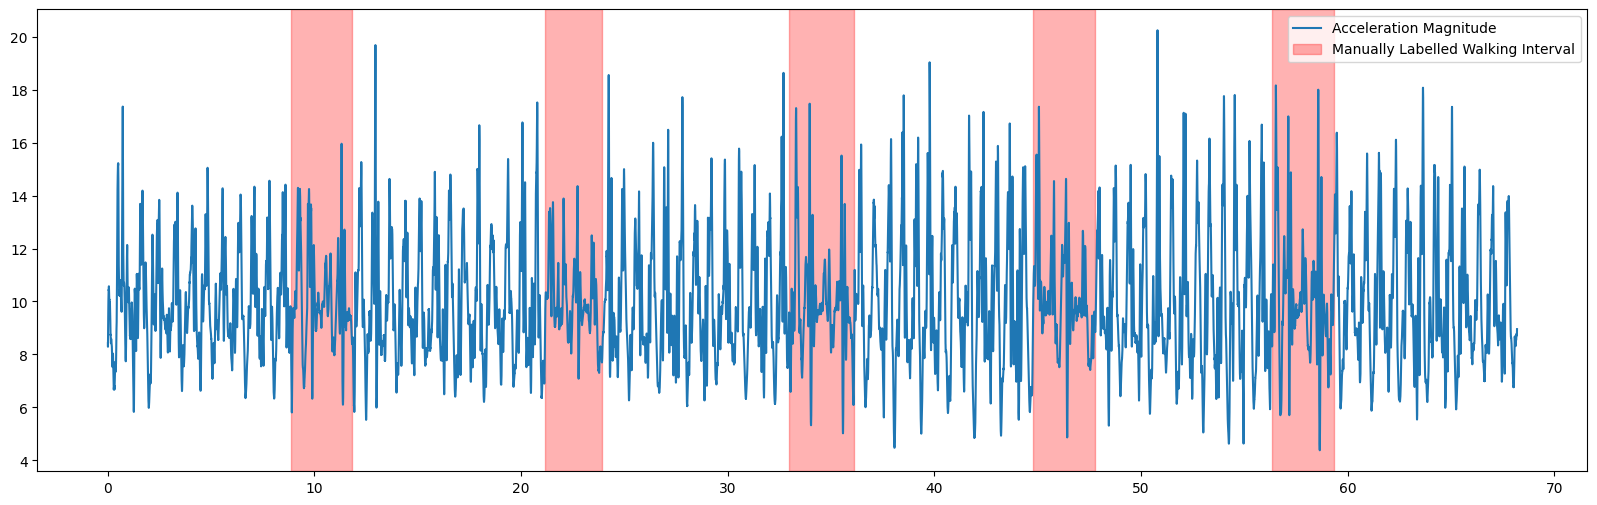

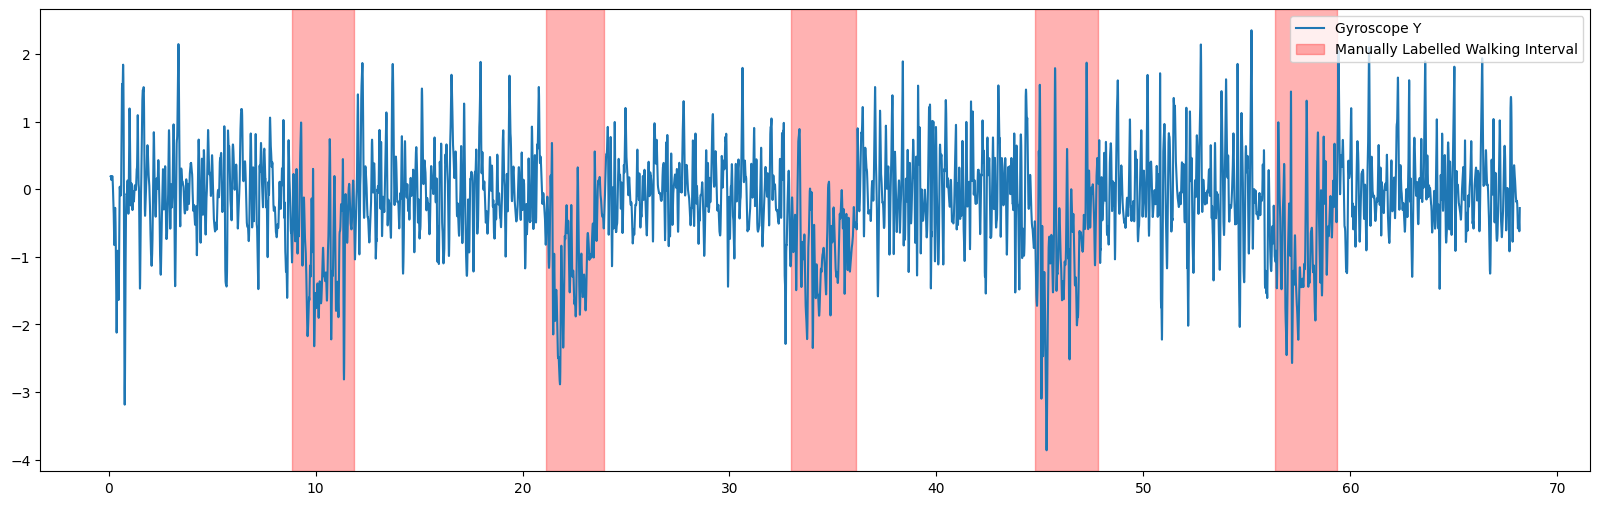

In [178]:
plt.rcParams['figure.figsize'] = [20, 6]
walking_intervals = [
    (8.86, 11.84),
    (21.15, 23.94),
    (32.98, 36.13),
    (44.78, 47.79),
    (56.34, 59.34),  # 59.34 is conjecture
]
# plot mags
data = parser_data.get_data("climb_steps_accel_clean.csv")
data = np.array(data)
mags = vector_magnitude(data)
plt.plot(data[:,0], mags, label="Acceleration Magnitude")
# plot a full height rectangle for each walking interval
for n, interval in enumerate(walking_intervals):
    plt.axvspan(interval[0], interval[1], color='r', alpha=0.3, label=("Manually Labelled Walking Interval" if n == 0 else None))
plt.legend(loc='upper right')
plt.show()
data = parser_data.get_data("climb_steps_gyro_clean.csv")
data = np.array(data)
mags = vector_magnitude(data)
# plot a full height rectangle for each walking interval
# plt.plot(mags)
plt.plot(data[:,0], data[:,-2], label="Gyroscope Y")
for n, interval in enumerate(walking_intervals):
    plt.axvspan(interval[0], interval[1], color='r', alpha=0.3, label=("Manually Labelled Walking Interval" if n == 0 else None))
plt.legend(loc='upper right')


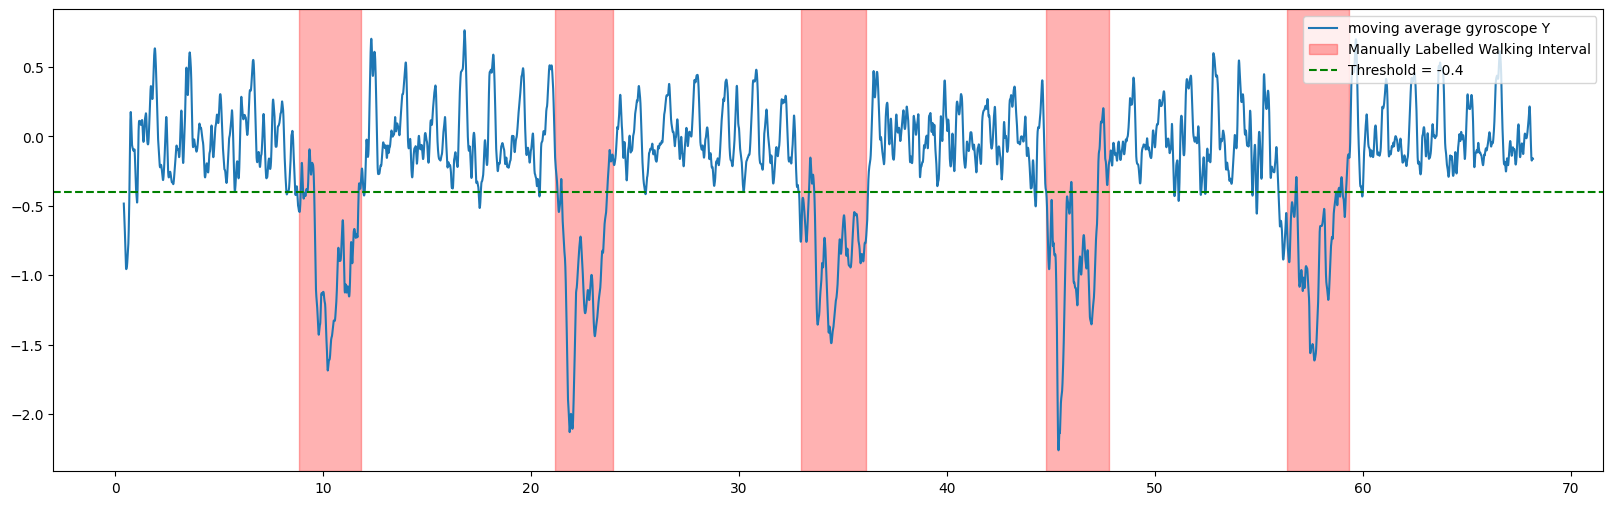

In [184]:
# moving average of gyroscope Y

data = parser_data.get_data("climb_steps_gyro_clean.csv")
data = np.array(data)
ys = data[:,-2]
ts = data[156:,0]

ma1 = moving_average(ys, 157)
plt.plot(ts, ma1, label="moving average gyroscope Y")
for n, interval in enumerate(walking_intervals):
    plt.axvspan(interval[0], interval[1], color='r', alpha=0.3, label=("Manually Labelled Walking Interval" if n == 0 else None))
# plot a hline at -0.5
plt.axhline(y=-0.4, color='g', linestyle='--', label="Threshold = -0.4")
# media of ys
plt.legend(loc='upper right')


In [170]:
def absorb(interval_list_in, absorption_threshold):
    interval_list = [x for x in interval_list_in]
    """
    interval_list: a list of dicts with keys 'start', and 'sign' (technically sign unnecessary since it alternates)
    so interval list is actually just a list of starts. Make sure it starts and ends w/ 0 and T.
    iteratively absorb the smallest intervals into its neighbors.
    """
    while True:
        smallest_interval_idx = 0
        smallest_interval = 1000  # just a big number
        for i in range(0, len(interval_list)-1):
            if interval_list[i+1] - interval_list[i] < smallest_interval:
                smallest_interval = interval_list[i+1] - interval_list[i]
                smallest_interval_idx = i
        if smallest_interval >= absorption_threshold:
            break
        interval_list.pop(smallest_interval_idx)
        interval_list.pop(smallest_interval_idx)
    return interval_list

In [171]:
# find zero crossings in ys
zcs = np.diff(np.sign(ma1 + 0.4)).nonzero()[0]
xs = [0.0] + list(zcs) + [len(ts)]
good_zcs = absorb(xs, 500)[0:-1]
good_zcs = np.array(good_zcs)
from einops import rearrange
detected_walking_intervals = rearrange(good_zcs, '(l c) -> l c', c=2)
detected_walking_intervals

array([[ 4185,  5667],
       [10468, 11664],
       [16292, 17960],
       [22261, 23504],
       [27864, 29307]])

array([[ 4185,  5667],
       [10468, 11664],
       [16292, 17960],
       [22261, 23504],
       [27864, 29307]])

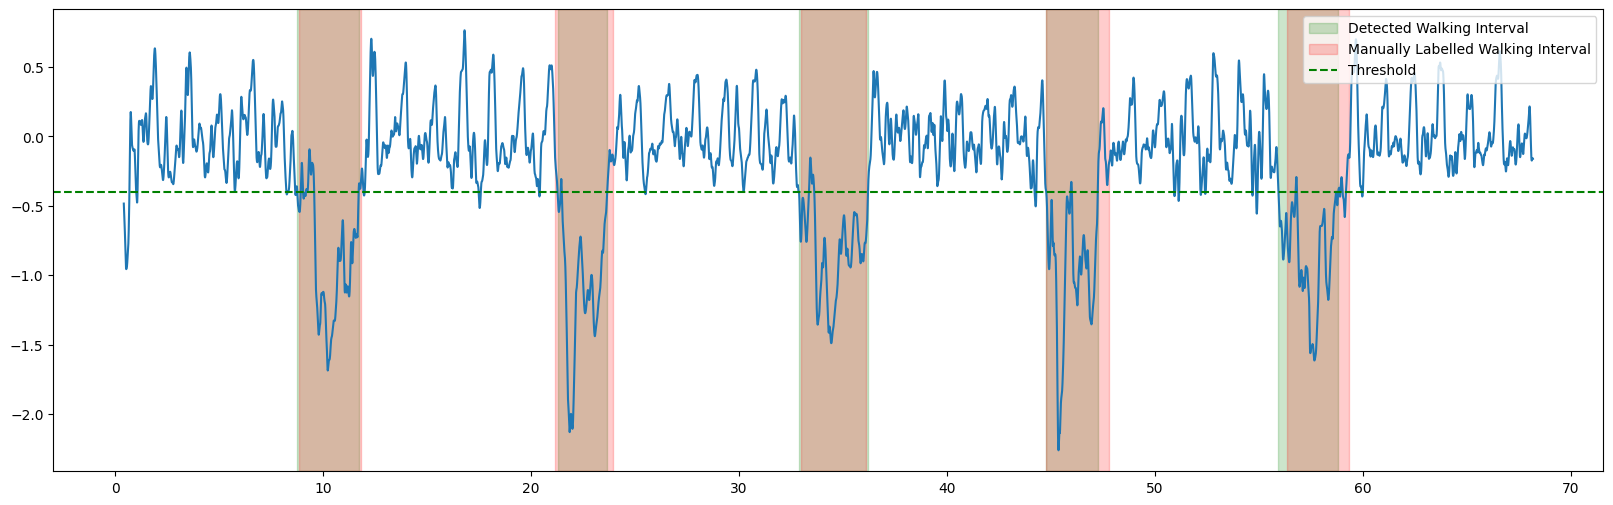

In [185]:
plt.plot(ts, ma1)
for i, detected_interval in enumerate(detected_walking_intervals):
    plt.axvspan(ts[detected_interval[0]], ts[detected_interval[1]], color='g', alpha=0.2, label=("Detected Walking Interval" if i == 0 else None))
for i, labelled_interval in enumerate(walking_intervals):
    plt.axvspan(labelled_interval[0], labelled_interval[1], color='r', alpha=0.2, label=("Manually Labelled Walking Interval" if i == 0 else None))
# hline
plt.axhline(y=-0.4, color='g', linestyle='--', label="Threshold")
plt.legend(loc='upper right')
detected_walking_intervals

In [173]:
xs = [0] + list(good_zcs) + [len(ts)-1]
xs = np.array(xs)
climbing_intervals = rearrange(xs, '(l c) -> l c', c=2)
climbing_intervals

array([[    0,  4185],
       [ 5667, 10468],
       [11664, 16292],
       [17960, 22261],
       [23504, 27864],
       [29307, 34006]])

In [186]:
accel_data = parser_data.get_data("climb_steps_accel_clean.csv")
accel_data
accel_ts = np.array(accel_data)[:,0]
accel_idxs = []
xs = climbing_intervals.flatten()
gyro_ts = ts[xs]

In [187]:
# find the indices of the gyro_ts in accel_ts
for ts in gyro_ts:
    accel_idxs.append(np.argmin(np.abs(accel_ts - ts)))
accel_idxs = np.array(accel_idxs)
accel_climbing_intervals = rearrange(accel_idxs, '(l c) -> l c', c=2)

87 287
Number of steps: 14
83 264
Number of steps: 18
82 260
Number of steps: 17
77 246
Number of steps: 17
75 246
Number of steps: 17
77 258
Number of steps: 18


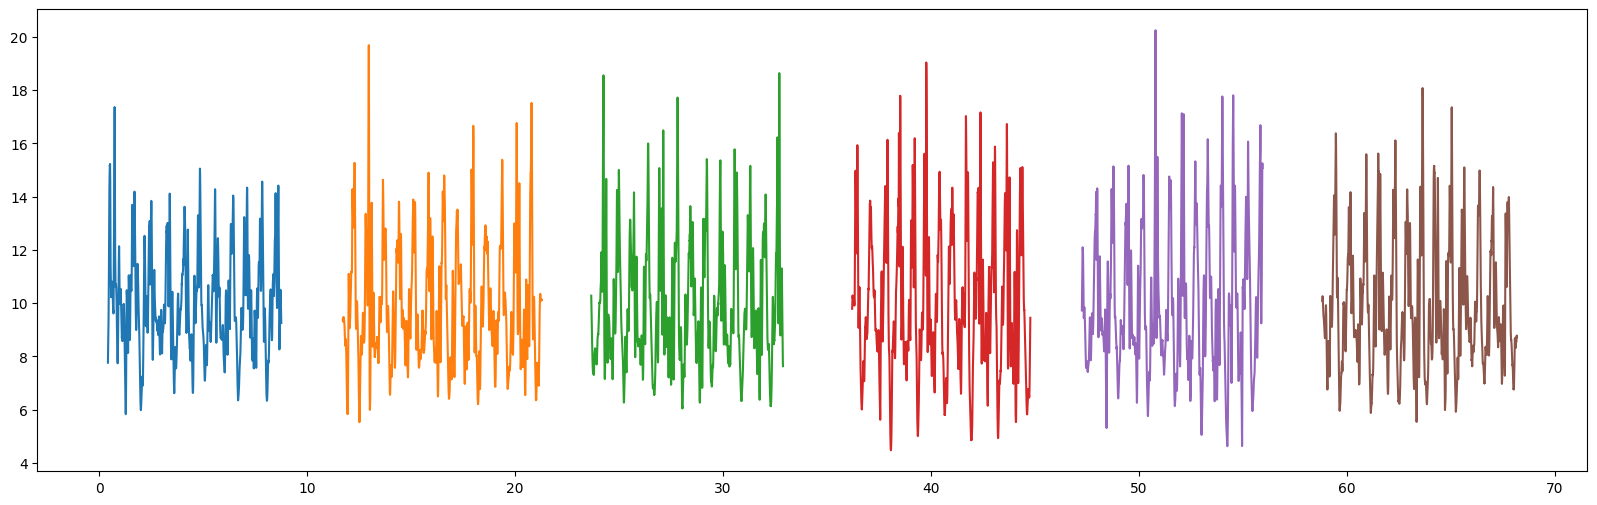

In [176]:
from statsmodels.tsa.stattools import acf
for interval in accel_climbing_intervals:
    accel_tseries = np.array(accel_data)[interval[0]:interval[1], :]
    mag_tseries = vector_magnitude(accel_tseries)
    plt.plot(accel_tseries[:,0], mag_tseries)
    acf_vals = acf(mag_tseries, nlags=1000)
    first_min = np.where(acf_vals < 0)[0][0]
    first_max = np.where(acf_vals[first_min:] > 0)[0][0] + first_min
    print(first_min, first_max)
    period = first_max
    n_steps = len(mag_tseries) // period
    print(f"Number of steps: {n_steps}")

plt.show()

# c
Here we try a different step-counting technique where we estimate the period with the first maximum of the autocorrelation function and calculate the number of steps in each climbing interval as duration/period.
Our results are:
```
interval_no     steps
1               14
2               18
3               17
4               17
5               17
6               18
```

# d

Our step-counting method does not identify individual steps. See above.

# e

Unlike the method presented in class we are not explicitly using a sliding window and a recognizer.
However we can reframe our algorithm in these terms by see the moving_average + threshold operations
as constituting a recognizer with a window width of 0.16s.

Because our "window offset" is 1 frame, our method potentially gives a different classification for every single frame. 

We solve this in post-processing with the interval absorption technique described in part (a).

<span style="color:blue; font-size:2em;"> **BONUS: TASK 5** </span>

### INSTRUCTIONS
**In your report** <br>
**[5 points]** Match the dataset to the TA! Write the name of the dataset as provided to you next to the TA’s name. <br>

**[5 points]** Explain your process and methods - how did you go about solving this problem? ATTACH your source-code Python file (task5.py).


**Code and Data files** <br>
In folder /data - Download and unzip the data from Canvas <br>
Task5.py - Modify source-code task5.py below.

**Note: Make sure you add/modify code below or your task 5 will not be graded.**

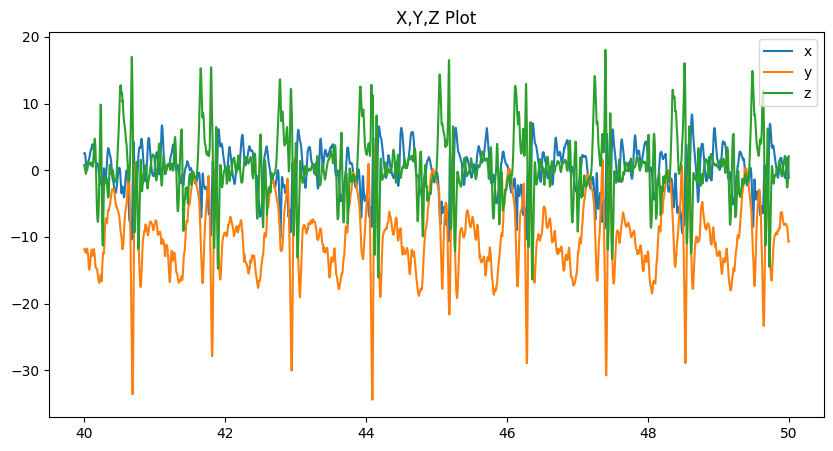

In [154]:
# Example training data
data = parser_data.get_data("ta_walking_data/train/shlok/window5.csv")
plot_data(data)

In [156]:
from statsmodels.tsa.stattools import acf

def extract_features(tseries):
    tseries = np.array(tseries)
    mean = tseries.mean()
    std = tseries.std()
    tseries_centered = tseries - mean
    zcr = ((tseries_centered[:-1] * tseries_centered[1:]) < 0).sum()
    acf_vals = acf(tseries, nlags=200)
    acf_deriv = np.diff(acf_vals)
    acf_min = float(acf_vals.argmin())
    # extrema are indices where acf_deriv changes sign
    # acf_extrema = np.where(np.diff(np.sign(acf_deriv)))[0]
    return (mean, std, float(zcr), acf_min)

In [165]:
Xs = []
Ys = []
# build the train matrix
for n, name in enumerate(('dylan', 'ming', 'shlok')):
    for i in range(1, 12 + 1):
        data = parser_data.get_data(f"ta_walking_data/train/{name}/window{i}.csv")
        data = np.array(data)
        features = extract_features(data[:,-1])
        Xs.append(features)
        Ys.append([1 if idx==n else 0 for idx in range(3)])
Xs = np.array(Xs)
# zscore normalize
Xs = (Xs - Xs.mean(axis=0)) / Xs.std(axis=0)
Ys = np.array(Ys)

In [166]:
# train a linear regression model
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(Xs, Ys)
model.predict(Xs) - Ys
model.coef_

array([[ 0.33737183,  0.02281798, -0.01048002, -0.37169041],
       [-0.4519966 , -0.0183698 ,  0.00163052, -0.04928401],
       [ 0.11462477, -0.00444817,  0.0088495 ,  0.42097442]])

In [163]:
Xs = []
Ys = []
# build the test matrix
for i in range(1, 9 + 1):
    data = parser_data.get_data(f"ta_walking_data/test/test_window{i}.csv")
    data = np.array(data)
    features = extract_features(data[:,-1])
    Xs.append(features)
Xs = np.array(Xs)
Xs = (Xs - Xs.mean(axis=0)) / Xs.std(axis=0)
model.predict(Xs)

array([[ 1.000569  , -0.05183592,  0.05126692],
       [-0.0429065 ,  1.0079656 ,  0.03494091],
       [-0.01559587,  1.01779784, -0.00220197],
       [-0.06403596,  0.04724444,  1.01679152],
       [ 1.11190927, -0.0224967 , -0.08941257],
       [ 0.00494436, -0.00523287,  1.00028851],
       [ 0.01479251,  0.97156415,  0.01364334],
       [ 0.96816615, -0.00386061,  0.03569446],
       [ 0.02215704,  0.03885409,  0.93898887]])

# Predictions
```
test_window1.csv                Dylan
test_window2.csv                Ming
test_window3.csv                Ming
test_window4.csv                Shlok
test_window5.csv                Dylan
test_window6.csv                Shlok
test_window7.csv                Ming
test_window8.csv                Dylan
test_window9.csv                Shlok
```

# Method
We perfromed linear regression on four features of the magnitude of the acceleration data:
- mean
- std
- number of zero crossings
- first minimum of the autocorrelation function

Of these, only the mean and the first minimum were helpful features.